In [4]:
# imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#import imblearn
import matplotlib.pyplot as plt

In [5]:
# read the dataset
df = pd.read_csv('clinical.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'clinical.csv'

In [ ]:
df.head()

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB
None


In [5]:
#remove whitespace from column names
df.columns=df.columns.str.strip()

In [6]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning the data

In [7]:
#create a dataframe with important features
df = df[['Patient age quantile', 'SARS-Cov-2 exam result', 'Hematocrit','Hemoglobin', 'Platelets', 'Mean platelet volume',
         'Red blood Cells', 'Lymphocytes', 'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes', 'Basophils', 
         'Mean corpuscular hemoglobin (MCH)', 'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes', 
         'Red blood cell distribution width (RDW)', 'Proteina C reativa mg/dL', 'Neutrophils','Influenza B, rapid test', 
         'Influenza A, rapid test']].copy()

In [8]:
#confirm important features dataframe created
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 20 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient age quantile                              5644 non-null   int64  
 1   SARS-Cov-2 exam result                            5644 non-null   object 
 2   Hematocrit                                        603 non-null    float64
 3   Hemoglobin                                        603 non-null    float64
 4   Platelets                                         602 non-null    float64
 5   Mean platelet volume                              599 non-null    float64
 6   Red blood Cells                                   602 non-null    float64
 7   Lymphocytes                                       602 non-null    float64
 8   Mean corpuscular hemoglobin concentration (MCHC)  602 non-null    float64
 9   Leukocytes         

No data types need to be changed but the two influenza tests will need to be mapped. Will be completed below.

#### 1. Proportion of patients that are COVID-19 positive

In [9]:
#Display the split of negative vs positive patients
df["SARS-Cov-2 exam result"].value_counts(sort = True)

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

In [10]:
#Display the percentage of negative vs positive patients
df["SARS-Cov-2 exam result"].value_counts(normalize = True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

The proportion of patients that have a postive COVID-19 result is about 10%, while 90% of the tests are negative

Decision trees can handle some missing values well, but it cannot handles lots of them. Therefore, we need to explore the data to view the amount of missing data.

In [11]:
df.isna().sum()

Patient age quantile                                   0
SARS-Cov-2 exam result                                 0
Hematocrit                                          5041
Hemoglobin                                          5041
Platelets                                           5042
Mean platelet volume                                5045
Red blood Cells                                     5042
Lymphocytes                                         5042
Mean corpuscular hemoglobin concentration (MCHC)    5042
Leukocytes                                          5042
Basophils                                           5042
Mean corpuscular hemoglobin (MCH)                   5042
Eosinophils                                         5042
Mean corpuscular volume (MCV)                       5042
Monocytes                                           5043
Red blood cell distribution width (RDW)             5042
Proteina C reativa mg/dL                            5138
Neutrophils                    

Cannot impute for the Influenza A and B rapid test as they are not numerical. 

Below we observe what occurs if we drop the missing data

In [12]:
df_drop = df.dropna()

In [13]:
#Display the split of negative vs positive patients
df_drop["SARS-Cov-2 exam result"].value_counts(sort = True)

negative    115
positive     18
Name: SARS-Cov-2 exam result, dtype: int64

If the missing values are dropped we lose too much data. As such we will have to impute the mean for the blood test results. 

Missing values for the Influenza A and B tests have also been dropped as 4824 records have missing data which is too much for a decision tree to handle. Decision trees can handle some missing values but not a lot.

In [14]:
#creating a function
def data_prep():
    # read the veteran dataset
    df = pd.read_csv('clinical.csv')

    #remove whitespace from column names
    df.columns=df.columns.str.strip()
    
    #create a dataframe with important features
    df = df[['Patient age quantile', 'SARS-Cov-2 exam result', 'Hematocrit','Hemoglobin', 'Platelets', 'Mean platelet volume',
         'Red blood Cells', 'Lymphocytes', 'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes', 'Basophils', 
         'Mean corpuscular hemoglobin (MCH)', 'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes', 
         'Red blood cell distribution width (RDW)', 'Proteina C reativa mg/dL', 'Neutrophils','Influenza B, rapid test', 
         'Influenza A, rapid test']].copy()

    # change Influenza variables into binary 0/1 variable
    influenza_map = {'negative':0, 'positive': 1}
    df['Influenza B, rapid test'] = df['Influenza B, rapid test'].map(influenza_map)
    df['Influenza A, rapid test'] = df['Influenza A, rapid test'].map(influenza_map)
    
    #need to map SARS-Cov-2 exam result
    COVID_map = {'negative':0, 'positive': 1}
    df['SARS-Cov-2 exam result'] = df['SARS-Cov-2 exam result'].map(COVID_map)

    # impute missing values with its mean
    df['Hematocrit'].fillna(df['Hematocrit'].mean(), inplace=True)
    df['Hemoglobin'].fillna(df['Hemoglobin'].mean(), inplace=True)
    df['Platelets'].fillna(df['Platelets'].mean(), inplace=True)
    df['Mean platelet volume'].fillna(df['Mean platelet volume'].mean(), inplace=True)
    df['Red blood Cells'].fillna(df['Red blood Cells'].mean(), inplace=True)
    df['Lymphocytes'].fillna(df['Lymphocytes'].mean(), inplace=True)
    df['Mean corpuscular hemoglobin concentration (MCHC)'].fillna(df['Mean corpuscular hemoglobin concentration (MCHC)'].mean(), inplace=True)
    df['Leukocytes'].fillna(df['Leukocytes'].mean(), inplace=True)
    df['Basophils'].fillna(df['Basophils'].mean(), inplace=True)
    df['Mean corpuscular hemoglobin (MCH)'].fillna(df['Mean corpuscular hemoglobin (MCH)'].mean(), inplace=True)
    df['Eosinophils'].fillna(df['Eosinophils'].mean(), inplace=True)
    df['Mean corpuscular volume (MCV)'].fillna(df['Mean corpuscular volume (MCV)'].mean(), inplace=True)
    df['Monocytes'].fillna(df['Monocytes'].mean(), inplace=True)
    df['Red blood cell distribution width (RDW)'].fillna(df['Red blood cell distribution width (RDW)'].mean(), inplace=True)
    df['Proteina C reativa mg/dL'].fillna(df['Proteina C reativa mg/dL'].mean(), inplace=True)
    df['Neutrophils'].fillna(df['Neutrophils'].mean(), inplace=True)
    
    # remove rows with missing values
    df.dropna(inplace = True)
    
    # one-hot encoding
    df = pd.get_dummies(df)
    
    # target/input split
    y = df['SARS-Cov-2 exam result']
    X = df.drop(['SARS-Cov-2 exam result'], axis=1)

    # setting random state
    rs = 10

    X_mat = X.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

    return df,X,y,X_train, X_test, y_train, y_test

In [15]:
from dm_tree import data_prep 
df,X,y,X_train, X_test, y_train, y_test = data_prep()

In [16]:
df.isna().sum()

Patient age quantile                                0
SARS-Cov-2 exam result                              0
Hematocrit                                          0
Hemoglobin                                          0
Platelets                                           0
Mean platelet volume                                0
Red blood Cells                                     0
Lymphocytes                                         0
Mean corpuscular hemoglobin concentration (MCHC)    0
Leukocytes                                          0
Basophils                                           0
Mean corpuscular hemoglobin (MCH)                   0
Eosinophils                                         0
Mean corpuscular volume (MCV)                       0
Monocytes                                           0
Red blood cell distribution width (RDW)             0
Proteina C reativa mg/dL                            0
Neutrophils                                         0
Influenza B, rapid test     

There are no longer any missing values for the numerical and categorical features.

### Step 2 answers:
1. The proportion of patients is 10% positive and 90% negative for COVID-19. Oversampling or undersampling would ideally be used for this dataset to establish balance. The model will likely be very good at predicting negative cases, but due to the dataset containing only 10% of positive test results it may poorly predict them.
2. A quality issues that was addressed was the white space in the column names. A large issue with this dataset was that there was a large quantity of missing values and decision trees cannot handle a large amount of missing values. Removing all missing values would have drastically reduced the dataset from 5645 to 133. All blood test results were therefore imputed using the mean as the data was numerical. The data for the influenza tests was categorical so could not be imputed, and it did not make logical sense to fill them all with the mode (negative) as it may have influenced blood test results. As such, missing categorical data was removed too due to the large number of missing values.
3. The variables that have been chosen are all of the results of the regular blood test and the results for Influenza A and B (rapid test). The input/target variable is SARS-Cov-2 exam result. This is because the model is being build to predict whether an individual will be positive or negative for COVID-19.

### Step 3
#### building a tree with default settings

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import set_config

set_config(print_changed_only = False)
rs = 10
# simple decision tree training
model = DecisionTreeClassifier(random_state=rs)
model = model.fit(X_train, y_train)

print(model)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=10,
                       splitter='best')


In [18]:
#determine train accuracy
print("Train accuracy:", model.score(X_train, y_train))

Train accuracy: 0.9547038327526133


In [19]:
#determine test accuracy
print("Test accuracy:", model.score(X_test, y_test))

Test accuracy: 0.8861788617886179


In [20]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       227
           1       0.20      0.16      0.18        19

    accuracy                           0.89       246
   macro avg       0.57      0.55      0.56       246
weighted avg       0.87      0.89      0.88       246



In [21]:
# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

Patient age quantile : 0.3336483268559287
Leukocytes : 0.14114745848080146
Lymphocytes : 0.1306401093813167
Hematocrit : 0.0896807590698804
Platelets : 0.07733989135874529
Influenza B, rapid test : 0.05543304625471035
Proteina C reativa mg/dL : 0.04764973195210012
Red blood Cells : 0.04660516722633331
Monocytes : 0.03578624762256055
Hemoglobin : 0.020093594059577575
Influenza A, rapid test : 0.010918775426365367
Mean platelet volume : 0.009516324984070283
Red blood cell distribution width (RDW) : 0.001540567327609764
Mean corpuscular hemoglobin concentration (MCHC) : 0.0
Mean corpuscular hemoglobin (MCH) : 0.0
Eosinophils : 0.0
Mean corpuscular volume (MCV) : 0.0
Neutrophils : 0.0
Basophils : 0.0


In [22]:
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

# visualize
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph.write_png("dt_covid.png") # saved in the following file - will return True if successful

True

In [6]:
print(model.tree_.node_count)

NameError: name 'model' is not defined

In [24]:
from sklearn import tree
print(tree.export_text(model))

|--- feature_8 <= -0.97
|   |--- feature_0 <= 10.00
|   |   |--- class: 0
|   |--- feature_0 >  10.00
|   |   |--- feature_15 <= -0.49
|   |   |   |--- class: 0
|   |   |--- feature_15 >  -0.49
|   |   |   |--- class: 1
|--- feature_8 >  -0.97
|   |--- feature_1 <= 1.09
|   |   |--- feature_0 <= 2.50
|   |   |   |--- feature_0 <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  1.50
|   |   |   |   |--- feature_17 <= 0.50
|   |   |   |   |   |--- feature_13 <= -0.03
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_13 >  -0.03
|   |   |   |   |   |   |--- feature_18 <= 0.50
|   |   |   |   |   |   |   |--- feature_3 <= 0.46
|   |   |   |   |   |   |   |   |--- feature_15 <= -0.24
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_15 >  -0.24
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_3 >  0.46
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   

46 rules

Train accuracy: 0.9547038327526133
Test accuracy: 0.8861788617886179

93 nodes, 46 rules

1st variable split is Leukocytes <= -0.966

5 most important variables:
- Patient age quantile : 0.3336483268559287
- Leukocytes : 0.14114745848080146
- Lymphocytes : 0.1306401093813167
- Hematocrit : 0.0896807590698804
- Platelets : 0.07733989135874529

The parameters used are:
- max_leaf_nodes = None
- min_impurity_decrease = 0.0
- min_impurity_split = None
- min_samples_leaf = 1
- min_samples_split = 2
- min_weight_fraction_leaf = 0.0

### GridSearchCV

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 16),
          'min_samples_leaf': range(0, 25, 5)[1:]}

cv_1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),return_train_score=True, cv=10)
cv_1.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              random_state=10,
                                              splitter='best'),
             n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 16),
                         'min_samples_leaf': range(5, 

In [27]:
result_set = cv_1.cv_results_
print(result_set)

{'mean_fit_time': array([0.00139985, 0.00150018, 0.00120013, 0.00120001, 0.00120001,
       0.00130014, 0.00139999, 0.00130002, 0.00160046, 0.00150044,
       0.00140011, 0.00160022, 0.00170014, 0.00160027, 0.00129955,
       0.00150049, 0.00179992, 0.00180049, 0.00170059, 0.00180025,
       0.00180027, 0.00150042, 0.00170019, 0.00170035, 0.00189936,
       0.00179911, 0.00179994, 0.00189984, 0.00190027, 0.00200012,
       0.00170028, 0.00180018, 0.0022001 , 0.00180063, 0.00180049,
       0.00210061, 0.00190015, 0.00200012, 0.00180058, 0.00139985,
       0.00219991, 0.00220003, 0.00180037, 0.00170023, 0.00189993,
       0.00180008, 0.00160029, 0.00160055, 0.00240002, 0.00220003,
       0.00170007, 0.00180001, 0.00199986, 0.0020004 , 0.00130048,
       0.00170021, 0.00210018, 0.00199997, 0.00160012, 0.00159981,
       0.00170012, 0.00109999, 0.00130014, 0.00130019, 0.00160038,
       0.00119994, 0.00140011, 0.00139987, 0.00170019, 0.00160034,
       0.00139999, 0.00170043, 0.00170038, 0

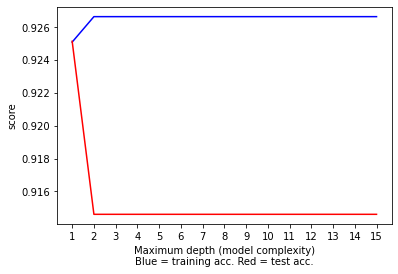

In [28]:
result_set['params']
dd = pd.DataFrame(result_set['params'])

train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']

max_depth_train = []
max_depth_test = []
index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==10)])
for i in range(len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.ylabel('score')
plt.show()

In [29]:
cv_1.fit(X_train, y_train)

print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

Train accuracy: 0.9407665505226481
Test accuracy: 0.8983739837398373


In [30]:
def analyse_feature_importance(dm_model, feature_names, n_to_display=20):
    # grab feature importances from the model
    importances = dm_model.feature_importances_
    
    # sort them out in descending order
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)

    # limit to 20 features, you can leave this out to print out everything
    indices = indices[:n_to_display]

    for i in indices:
        print(feature_names[i], ':', importances[i])

def visualize_decision_tree(dm_model, feature_names, save_name):
    dotfile = StringIO()
    export_graphviz(dm_model, out_file=dotfile, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dotfile.getvalue())
    graph.write_png(save_name) # saved in the following file

In [31]:
# do the feature importance and visualization analysis on GridSearchCV

analyse_feature_importance(cv_1.best_estimator_, X.columns, 20)
visualize_decision_tree(cv_1.best_estimator_, X.columns, "assignment_tree.png")

Patient age quantile : 0.39685041567201
Leukocytes : 0.292850312643877
Lymphocytes : 0.18069989729382976
Hematocrit : 0.12959937439028316
Hemoglobin : 0.0
Platelets : 0.0
Mean platelet volume : 0.0
Red blood Cells : 0.0
Mean corpuscular hemoglobin concentration (MCHC) : 0.0
Influenza A, rapid test : 0.0
Influenza B, rapid test : 0.0
Mean corpuscular hemoglobin (MCH) : 0.0
Eosinophils : 0.0
Mean corpuscular volume (MCV) : 0.0
Monocytes : 0.0
Red blood cell distribution width (RDW) : 0.0
Proteina C reativa mg/dL : 0.0
Neutrophils : 0.0
Basophils : 0.0


In [32]:
#default settings model
y_pred_dt = model.predict(X_test)
#GridSearchCV model
y_pred_dt_cv = cv_1.predict(X_test)

print("Accuracy score on test for DT_default:", accuracy_score(y_test, y_pred_dt))
print("Accuracy score on test for DT_optimal", accuracy_score(y_test, y_pred_dt_cv))

Accuracy score on test for DT_default: 0.8861788617886179
Accuracy score on test for DT_optimal 0.8983739837398373


### GridSearchCV Answers

Train accuracy: 0.9407665505226481
Test accuracy: 0.8983739837398373

11 nodes, 5 rules. The tree has significantly decreased from the tree in the previous step. This is because the optimal max depth has been chosen for this decision tree. Using the optimal max depth improves the accuracy of the decision tree whilst reducing overfitting.

The variable for the first split has not changed. It is still Leukocytes <= -0.966

There are only four important features for this decision tree:
- Patient age quantile : 0.39685041567201
- Leukocytes : 0.292850312643877
- Lymphocytes : 0.18069989729382976
- Hematocrit : 0.12959937439028316

Overfitting is seen when the training accuracy is very high but the model performs poor on test accuracy (high variance). In this model we have seen an improvement in the test accuracy compared to the first model, and the test accuracy is < 5% lower than the training. As such, overfitting has been minimised in this model.

The parameters have not changed from the first model:
- max_leaf_nodes=None,
- min_impurity_decrease=0.0,
- min_impurity_split=None,
- min_samples_leaf=1,
- min_samples_split=2,
- min_weight_fraction_leaf=0.0

### 3 - ROC

The size of the tree using GridSearchCV has significantly reduced from the first model using default settings. The reduction for nodes is 93 to 11, and 46 rules to five. The training accuracy has slightly reduced in the GridSearchCV decision tree whilst the test accuracy has slightly increased. This suggests that overfitting has reduced in the model using GridSearchCV.

In [35]:
dt_cv_best = cv_1.best_estimator_
# probability prediction from decision tree
y_pred_proba_dt = dt_cv_best.predict_proba(X_test)

print("Probability produced by decision tree for each class vs actual prediction on SARS-Cov-2 exam result (0 = megative, 1 = positive).")
print("(Probs on zero)\t(prediction made)")
# print top 10
for i in range(20):
    print(y_pred_proba_dt[i][0], '\t', y_pred_proba_dt[i][1], '\t', y_pred[i])

Probability produced by decision tree for each class vs actual prediction on SARS-Cov-2 exam result (0 = megative, 1 = positive).
(Probs on zero)	(prediction made)
0.9114285714285715 	 0.08857142857142856 	 0
0.2 	 0.8 	 0
0.9114285714285715 	 0.08857142857142856 	 0
0.9114285714285715 	 0.08857142857142856 	 0
0.9114285714285715 	 0.08857142857142856 	 0
0.995 	 0.005 	 0
0.9114285714285715 	 0.08857142857142856 	 0
0.9114285714285715 	 0.08857142857142856 	 0
0.9114285714285715 	 0.08857142857142856 	 0
0.9114285714285715 	 0.08857142857142856 	 0
0.9114285714285715 	 0.08857142857142856 	 0
0.995 	 0.005 	 0
0.995 	 0.005 	 0
0.9114285714285715 	 0.08857142857142856 	 0
0.9114285714285715 	 0.08857142857142856 	 0
0.9114285714285715 	 0.08857142857142856 	 0
0.995 	 0.005 	 0
0.995 	 0.005 	 0
0.995 	 0.005 	 0
0.9114285714285715 	 0.08857142857142856 	 1


In [36]:
#To compute the ROC AUC score

from sklearn.metrics import roc_auc_score

y_pred_proba_dt = model.predict_proba(X_test)
y_pred_proba_dt_cv = dt_cv_best.predict_proba(X_test)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])

print("ROC index on test for DT_default:", roc_index_dt)
print("ROC index on test for DT_optimal:", roc_index_dt_cv)

ROC index on test for DT_default: 0.5095061442151635
ROC index on test for DT_optimal: 0.6476930210990031


In [37]:
# to plot the curve

from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])

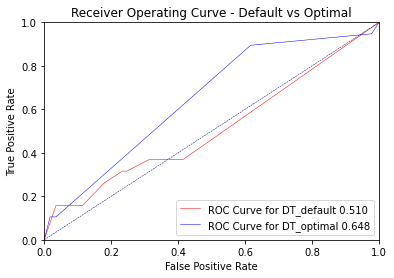

In [39]:
plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_default {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_optimal {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)

# plt.plot(fpr[2], tpr[2], color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Curve - Default vs Optimal')
plt.legend(loc="lower right")
plt.show()

The decision tree produced with GridSearchCV (DT_optimal) shows the largest curve area compared to the decision tree with default settings (DT_default). Thus DT_optimal is the best performing model.

The size of the optimal tree has significantly decreased from the default tree. This is due to the optimal max depth being chosen. Using the optimal max depth improves the accuracy of the decision tree whilst reducing overfitting. This change occurs from changing the hyperparameters using GridSearchCV. In the optimal model we have seen an improvement in the test accuracy compared to the first model, and the test accuracy is < 5% lower than the training. As such, overfitting has been minimised in this model.

The following rules may help to predict if a patient is postive for COVID-19:
- Leukocytes <= -0.966 and with a patient age quantile > 10.0
- Leukocytes > -0.966, Hematocrit > 1.095, and Lymphocytes <= -0.36

These two rules have been selected as within the value groups more patients test positive than negative.

The majority of positive cases fall into the following rule, but so do negative cases. As such, it would make it difficult to be able to predict positive cases from this rule:
- Leukocytes > -0.966, Hematocrit <= 1.095, and patient age quantile > 2.5